In [29]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

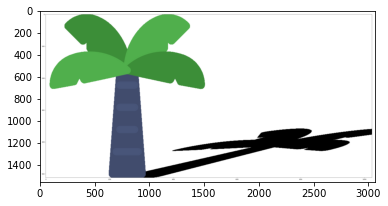

In [30]:
resimg = cv.imread("palm_result.png")
plt.imshow(resimg)

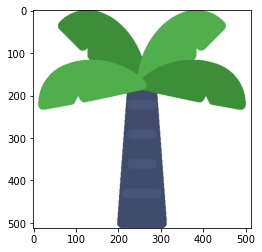

In [31]:
img = cv.imread("palm.png")
plt.imshow(img)

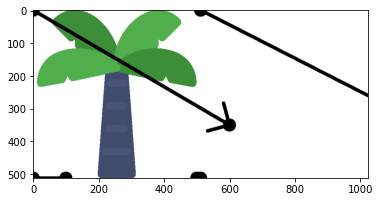

In [32]:
height, width = img.shape[:2]
width2 = width * 2
pts1 = [
    [0, 0],
    [width, 0],
    [0, height],
    [width, height],
]
pts2 = [
    [600, 350],
    [1200, 350],
    [100, height],
    [500, height],
]

img2 = img.copy()
img2 = np.zeros((height, width2, 3), np.uint8)
img2.fill(255)
img2[0:512, 0:512, :] = img
for p1, p2 in zip(pts1, pts2):
    cv.circle(img2, center=p1, radius=20, color=(0, 0, 0), thickness=-1)
    cv.circle(img2, center=p2, radius=20, color=(0, 0, 0), thickness=-1)
    cv.arrowedLine(img2, p1, p2, color=(0, 0, 0), thickness=10) 
    
plt.imshow(img2)

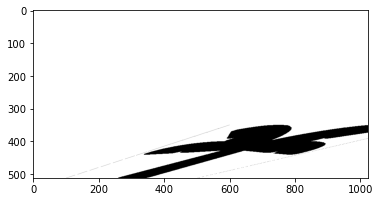

In [33]:
M = cv.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
img3 = cv.warpPerspective(img, M, (width2, height))
img3[img3 == 0] = 255
img3[img3 != 255] = 0
plt.imshow(img3)

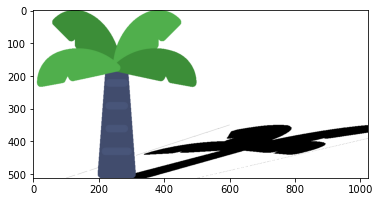

In [34]:
rimg = img3.copy()
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        if (img[x,y] != 255).all():
            rimg[x,y] = img[x,y]

plt.imshow(rimg)